In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import data pulled from boxofficemojo.com on November 15th, 2021
df = pd.read_csv('../data/movies.csv')

df = df[['Release','Opening','Date', 'Distributor']]

def cleaner(string):
    '''
    Parameter: String
    Return: String

    Cleaner takes in a string and returns a string with all punctuation and special characters removed.
    '''
    string = "".join([l for l in string if l not in '!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~ ' ])
    return string

#converts the opening weekend revenue from a string to an integer
df['Opening'] = df['Opening'].apply(lambda x: int(cleaner(x)))

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

df['Year'] = df['Date'].dt.year

#Replace the 3 null Distributors with 'The Weinstein Company'
df.loc[(df.Distributor == '-'),'Distributor']='The Weinstein Company'

month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']

In [3]:
df.head(30)

,Release,Opening,Date,Distributor,Month,Year
0,Avengers: Endgame,357115007,2019-04-26,Walt Disney Studios Motion Pictures,4,2019
1,Avengers: Infinity War,257698183,2018-04-27,Walt Disney Studios Motion Pictures,4,2018
2,Star Wars: Episode VII - The Force Awakens,247966675,2015-12-18,Walt Disney Studios Motion Pictures,12,2015
3,Star Wars: Episode VIII - The Last Jedi,220009584,2017-12-15,Walt Disney Studios Motion Pictures,12,2017
4,Jurassic World,208806270,2015-06-12,Universal Pictures,6,2015
5,The Avengers,207438708,2012-05-04,Walt Disney Studios Motion Pictures,5,2012
6,Black Panther,202003951,2018-02-16,Walt Disney Studios Motion Pictures,2,2018
7,The Lion King,191770759,2019-07-19,Walt Disney Studios Motion Pictures,7,2019
8,Avengers: Age of Ultron,191271109,2015-05-01,Walt Disney Studios Motion Pictures,5,2015
9,Incredibles 2,182687905,2018-06-15,Walt Disney Studios Motion Pictures,6,2018


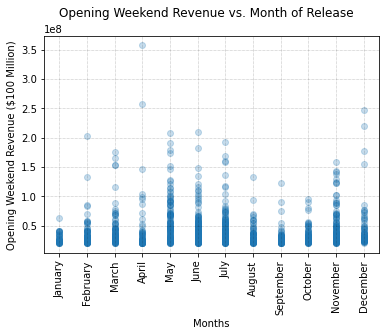

In [4]:
#Following is a scatterplot where the y-axis is the opening weekend revenue in $10 Million and the x-axis is the month the movie was released
#The plot suggests that movies released around June and November tend to make more money in their opening weekends.
def make_scatter(dataframe):
	fig, ax = plt.subplots()
	ax.scatter(x=dataframe['Month'],y=dataframe['Opening'], alpha = 0.25)
	plt.xticks(list(range(1,13)), rotation=90)
	ax.set_xticklabels(month_list)
	
	fig.suptitle('Opening Weekend Revenue vs. Month of Release')
	
	plt.xlabel('Months')
	plt.ylabel('Opening Weekend Revenue ($100 Million)')
	ax.grid(axis="x", color="black", alpha=.5, linewidth=.5, linestyle=":")
	ax.grid(axis="y", color="black", alpha=.5, linewidth=.5, linestyle=":")
	
	plt.show()

make_scatter(df)


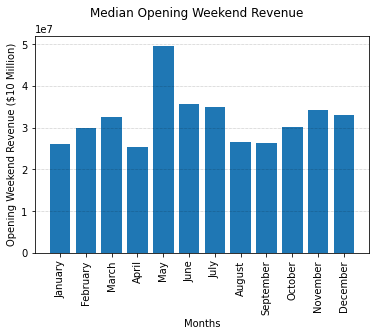

In [5]:
#As can be seen in the violin plots, May, November, July and June have the highest Median Opening Weekend Revenue.
#Movies released during these months generally made more money upon release.


#monthly_median_df = monthly_mean_df.groupby(by='Month', as_index=False).median().sort_values(by='Opening', ascending=False).reset_index()

def median_bar_graph(dataframe):
	'''
	Parameter: dataframe - DataFrame Object
	Return: Bar Graph
	
	Create a bar graph of the median box office revenue for each month's releases.
	'''
	
	monthly_median_df = dataframe[['Month','Opening','Year']]
	monthly_median_df = monthly_median_df.groupby(by='Month', as_index=False).median().reset_index()
	
	x_values = monthly_median_df['Month']
	y_values = monthly_median_df['Opening']

	fig, ax = plt.subplots()
	ax.bar(x_values,height=y_values)

	plt.xticks(list(range(1,13)), rotation=90)
	ax.set_xticklabels(month_list)
	
	fig.suptitle('Median Opening Weekend Revenue')

	plt.xlabel('Months')
	plt.ylabel('Opening Weekend Revenue ($10 Million)')
	ax.grid(axis="y", color="black", alpha=.5, linewidth=.5, linestyle=":")

	plt.tight_layout
	plt.show()

median_bar_graph(df)

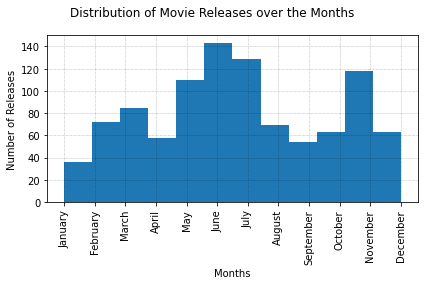

In [6]:
def make_hist(dataframe):
	'''
	Parameter: dataframe - DataFrame Object
	Return: Bar Graph
	
	Create a bar graph of the median box office revenue for each month's releases.
	'''
	
	fig, ax = plt.subplots()
	ax.hist(x=dataframe.Month,bins=12)

	plt.xticks(list(range(1,13)), rotation=90)
	ax.set_xticklabels(month_list)

	fig.suptitle('Distribution of Movie Releases over the Months')
	
	plt.xlabel('Months')
	plt.ylabel('Number of Releases')
	ax.grid(axis="x", color="black", alpha=.5, linewidth=.5, linestyle=":")
	ax.grid(axis="y", color="black", alpha=.5, linewidth=.5, linestyle=":")
	
	plt.tight_layout()
	plt.show()

make_hist(df)

In [7]:
df['Month'].value_counts()
#movies released in May, June, July and November had the most representation in this data set.
#This probably means that studios look at historical sales data, see that movies typically make more money when released during these months
#and decide to release their films accordingly.

6     143
7     129
11    118
5     110
3      85
2      72
8      69
12     63
10     63
4      58
9      54
1      36
Name: Month, dtype: int64

/var/folders/rk/hnsjvn5n5db6wrlq5nq1lmz00000gn/T/ipykernel_2817/2738787911.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  col.set_xticklabels(month_list,rotation=90)


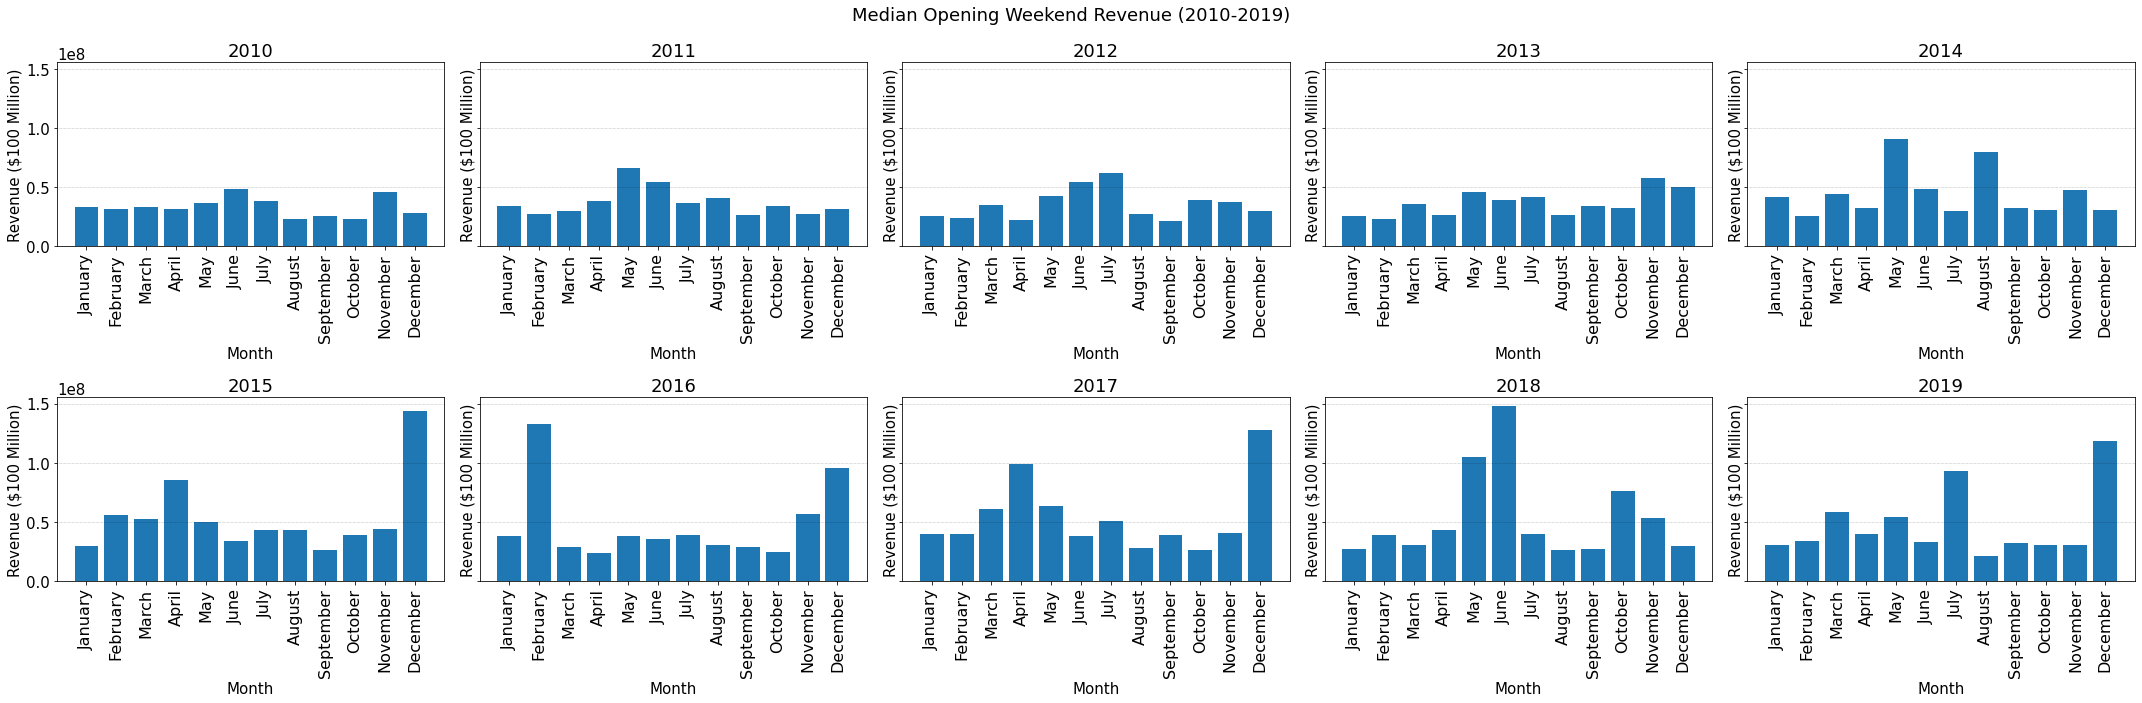

In [48]:
def create_year_bargraphs(dataframe):
	'''
	Parameter: dataframe - DataFrame Object
	Return: Bar Graph
	
	Creates bar graphs of the median box office revenue for each
	month's releases for the years 2010-2019.
	'''
	
	month_year_df = dataframe[['Month','Year','Opening']]
	year_list = [x for x in range(2010,2020)]

	fig, axes = plt.subplots(nrows=2, ncols=5, sharey=True,figsize=(30,10))
	i = 0
	for row in axes:
		for col in row:
			year_df = month_year_df.loc[(month_year_df.Year==year_list[i]),['Opening','Month']]
			plot_data = []
			for j in range(1,13):
				month_data = year_df.loc[(year_df.Month==j),'Opening']
				plot_data.append(month_data.median())
			col.bar(month_list,height=plot_data)
			col.title.set_text(f'{year_list[i]}')
			col.set_xticklabels(month_list,rotation=90)
			col.set_xlabel('Month')
			col.set_ylabel('Revenue ($100 Million)')
			col.grid(axis="y", color="black", alpha=.5, linewidth=.5, linestyle=":")
			i+=1
			
	#plt.setp(axes, xticks=list(range(0,12)),xticklabels=month_list)
	fig.suptitle('Median Opening Weekend Revenue (2010-2019)')
	
	plt.rc('xtick', labelsize=16)
	plt.tight_layout()
	plt.show()

create_year_bargraphs(df)

/var/folders/rk/hnsjvn5n5db6wrlq5nq1lmz00000gn/T/ipykernel_2817/133638205.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  col.set_xticklabels(month_list,rotation=45)


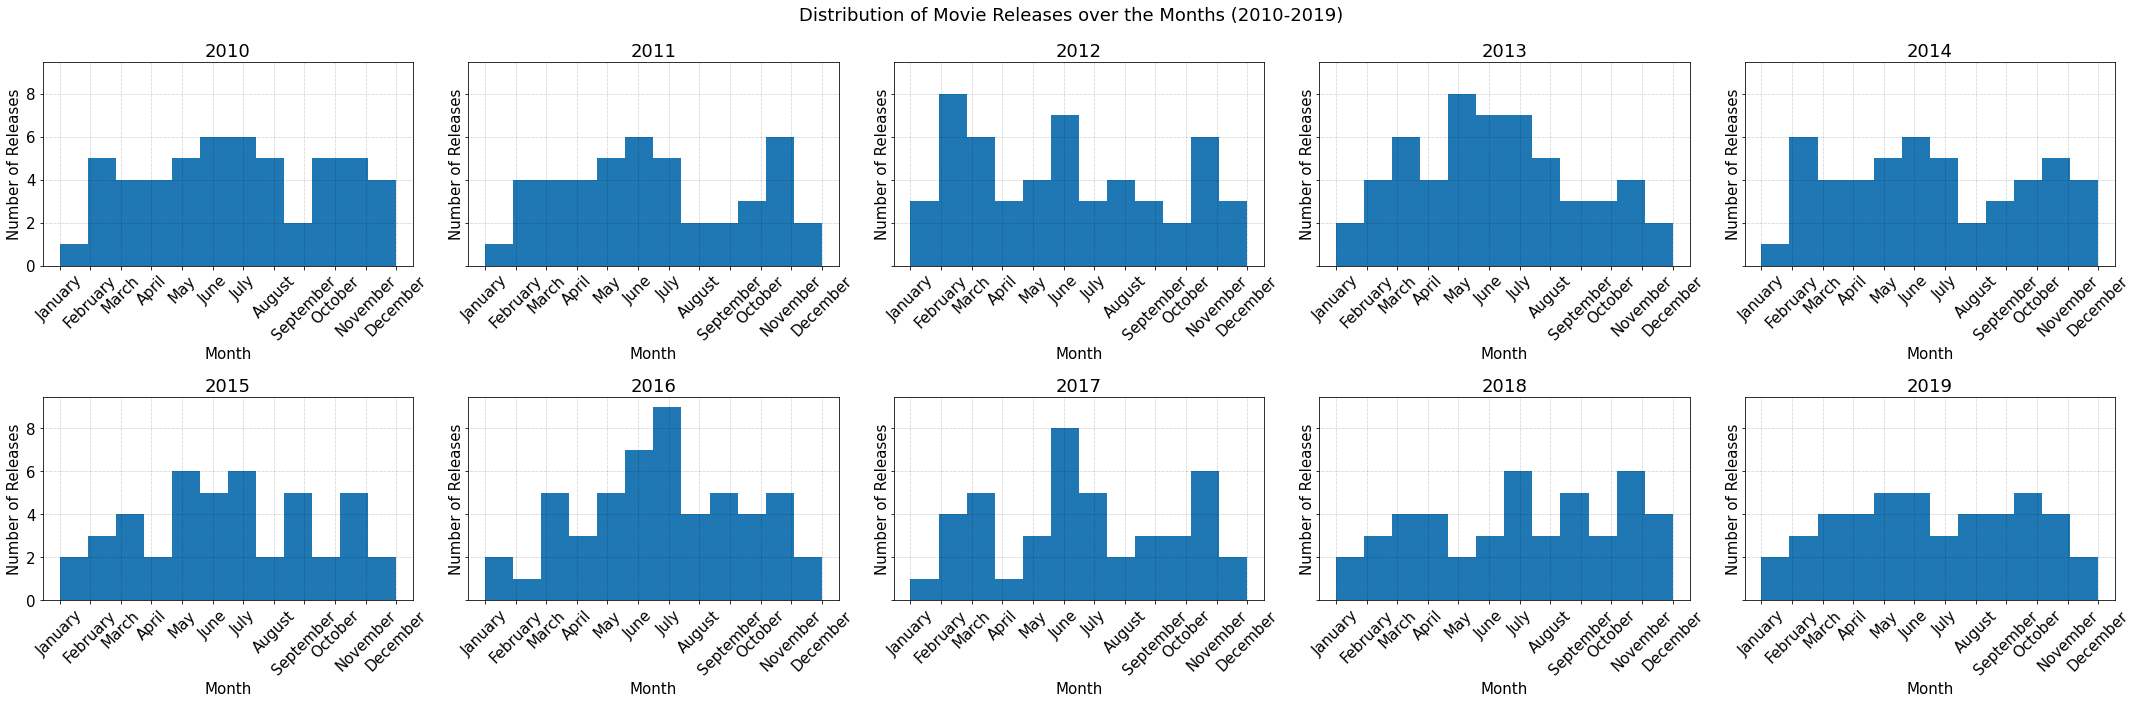

In [42]:
def create_year_hist(dataframe):
	'''
	Parameter: dataframe - DataFrame Object
	Return: Bar Graph
	
	Creates bar graphs of the median box office revenue for each
	month's releases for the years 2010-2019.
	'''
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	
	month_year_df = dataframe[['Month','Year','Opening']]
	year_list = [x for x in range(2010,2020)]

	fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,10), sharey=True)
	i = 0
	for row in axes:
		for col in row:
			month_series= month_year_df.loc[(month_year_df.Year==year_list[i]),['Month']]
			col.hist(x=month_series, bins=12)
			col.title.set_text(f'{year_list[i]}')
			col.set_xlabel('Month')
			col.set_ylabel('Number of Releases')
			col.grid(axis="x", color="black", alpha=.5, linewidth=.5, linestyle=":")
			col.grid(axis="y", color="black", alpha=.5, linewidth=.5, linestyle=":")
			col.set_xticklabels(month_list,rotation=45)
			i+=1
			
	#plt.setp(axes, xticks=list(range(0,12)),xticklabels=month_list)
	fig.suptitle('Distribution of Movie Releases over the Months (2010-2019)')
	plt.rc('xtick', labelsize=18)
	plt.setp(axes, xticks=list(range(1,13)))
	plt.tight_layout()
	plt.show()

create_year_hist(df)

In [10]:
df['Distributor'].value_counts()

Warner Bros.                           166
Universal Pictures                     150
Walt Disney Studios Motion Pictures    142
Twentieth Century Fox                  132
Sony Pictures Entertainment (SPE)      108
Paramount Pictures                     100
Lionsgate                               47
Screen Gems                             23
DreamWorks                              22
New Line Cinema                         20
DreamWorks Distribution                 14
Metro-Goldwyn-Mayer (MGM)               13
Revolution Studios                      10
TriStar Pictures                         8
Summit Entertainment                     6
The Weinstein Company                    6
Dimension Films                          5
Miramax                                  5
Focus Features                           3
Relativity Media                         3
STX Entertainment                        3
FilmDistrict                             2
Columbia Pictures                        2
20th Centur

In [11]:
def create_studio_df_list(dataframe):
	'''
	parameter: DataFrame
	returns: List of DataFrame Objects

	Takes in a DataFrame object and returns a list of DataFrame objects containing only data for one studio.
	'''
	studio_list = ['Warner Bros.','Universal Pictures','Walt Disney Studios Motion Pictures','Twentieth Century Fox']
	df_list = []
	for studio in studio_list:
		df_list.append(dataframe[dataframe['Distributor']==studio])
	return df_list

/var/folders/rk/hnsjvn5n5db6wrlq5nq1lmz00000gn/T/ipykernel_2817/928312753.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  col.set_xticklabels(month_list,rotation=45)


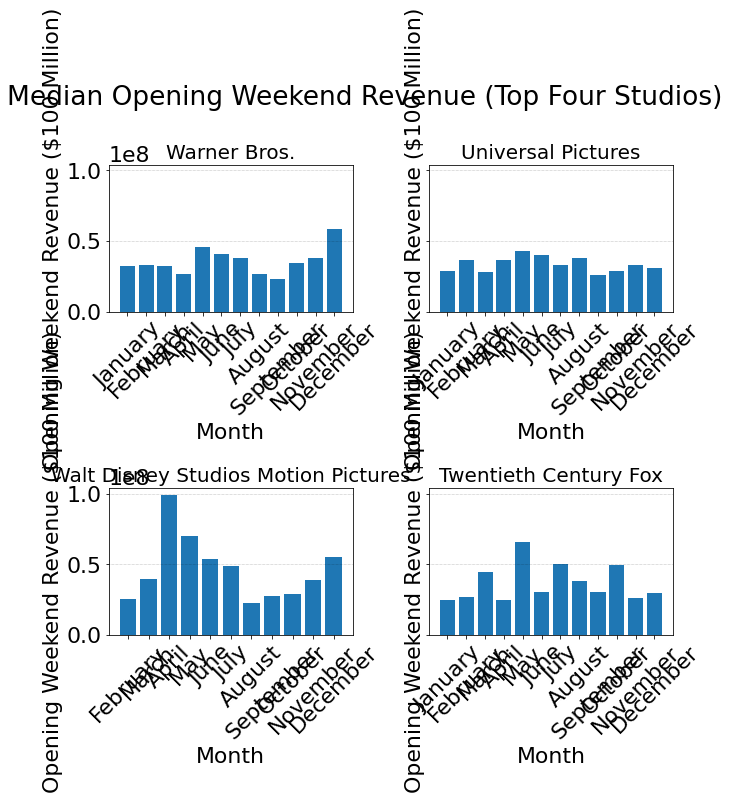

In [12]:
def create_studio_bargraphs(dataframe):
	'''
	parameter: DataFrame
	returns: None

	Takes in a DataFrame object and returns a scatterplot showing the
	Opening Weekend Revenue for each film for the past 10 years.
	'''
	studio_list = ['Warner Bros.','Universal Pictures','Walt Disney Studios Motion Pictures','Twentieth Century Fox']
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	df_list = create_studio_df_list(dataframe)

	fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10), sharey=True)
	
	i = 0
	for row in axes:
		for col in row:
			plot_data = []
			for month in range(1,13):
				month_data = df_list[i].loc[(df_list[i].Month==month),'Opening']
				plot_data.append(month_data.median())
			col.bar(month_list,height=plot_data)
			col.set_title(studio_list[i], fontsize = 20)
			col.set_xlabel('Month')
			col.set_ylabel('Opening Weekend Revenue ($100 Million)')
			col.grid(axis="y", color="black", alpha=.5, linewidth=.5, linestyle=":")
			col.set_xticklabels(month_list,rotation=45)
			i+=1
		
	fig.suptitle('Median Opening Weekend Revenue (Top Four Studios)')
	plt.tight_layout()
	plt.show()

create_studio_bargraphs(df)

/var/folders/rk/hnsjvn5n5db6wrlq5nq1lmz00000gn/T/ipykernel_2817/1098475838.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  col.set_xticklabels(month_list,rotation=45)


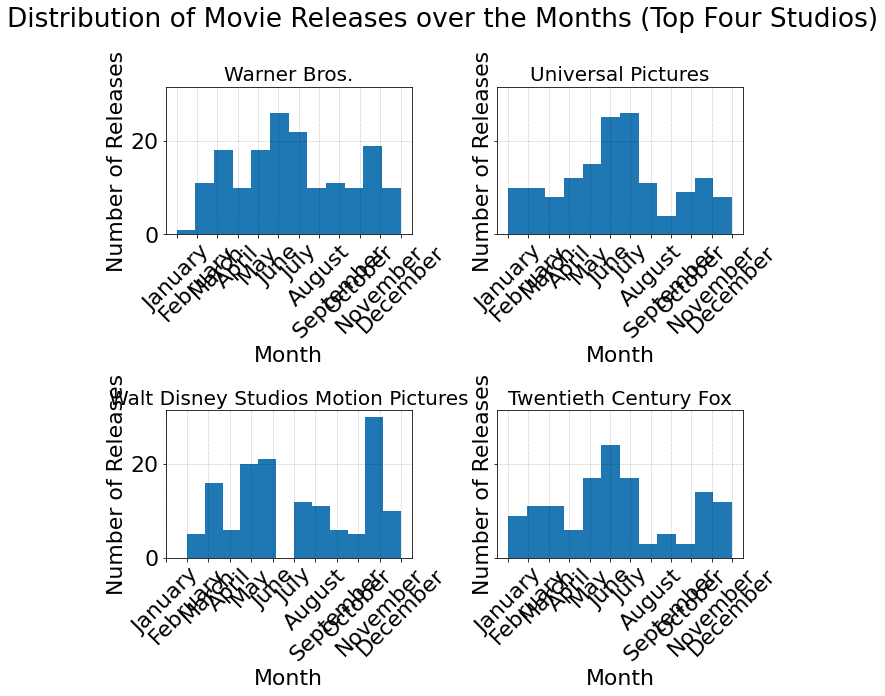

In [13]:
def create_studio_hist(dataframe):
	'''
	parameter: DataFrame
	returns: None

	Takes in a DataFrame object and returns a scatterplot showing the
	Opening Weekend Revenue for each film for the past 10 years.
	'''
	studio_list = ['Warner Bros.','Universal Pictures','Walt Disney Studios Motion Pictures','Twentieth Century Fox']
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	df_list = create_studio_df_list(dataframe)

	fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10), sharey=True)
	
	i = 0
	for row in axes:
		for col in row:
			month_series = df_list[i].Month
			col.hist(x=month_series, bins=12)
			col.set_title(studio_list[i], fontsize = 20)
			col.set_xlabel('Month')
			col.set_ylabel('Number of Releases')
			col.grid(axis="x", color="black", alpha=.5, linewidth=.5, linestyle=":")
			col.grid(axis="y", color="black", alpha=.5, linewidth=.5, linestyle=":")
			col.set_xticklabels(month_list,rotation=45)
			i+=1
		
	fig.suptitle('Distribution of Movie Releases over the Months (Top Four Studios)')
	plt.setp(axes, xticks=list(range(1,13)))
	plt.tight_layout()
	plt.show()

create_studio_hist(df)

In [14]:
df_list = create_studio_df_list(df)

df_list[0].Month.value_counts()

6     26
7     22
11    19
3     18
5     18
9     11
2     11
8     10
10    10
12    10
4     10
1      1
Name: Month, dtype: int64

In [15]:
df_list[1].Month.value_counts()

7     26
6     25
5     15
4     12
11    12
8     11
2     10
1     10
10     9
3      8
12     8
9      4
Name: Month, dtype: int64

In [16]:
df_list[2].Month.value_counts()

11    30
6     21
5     20
3     16
7     12
8     11
12    10
4      6
9      6
2      5
10     5
Name: Month, dtype: int64

In [17]:
df_list[3].Month.value_counts()

6     24
5     17
7     17
11    14
12    12
2     11
3     11
1      9
4      6
9      5
8      3
10     3
Name: Month, dtype: int64